<a href="https://colab.research.google.com/github/lvaneykeren/dllearning/blob/main/20210608_Intro_to_DL_First_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all necassary packages

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

# Example 1

We will first start with a simple example to make you understand how you can implement a neural network using keras. Let's say we want to make the following model: 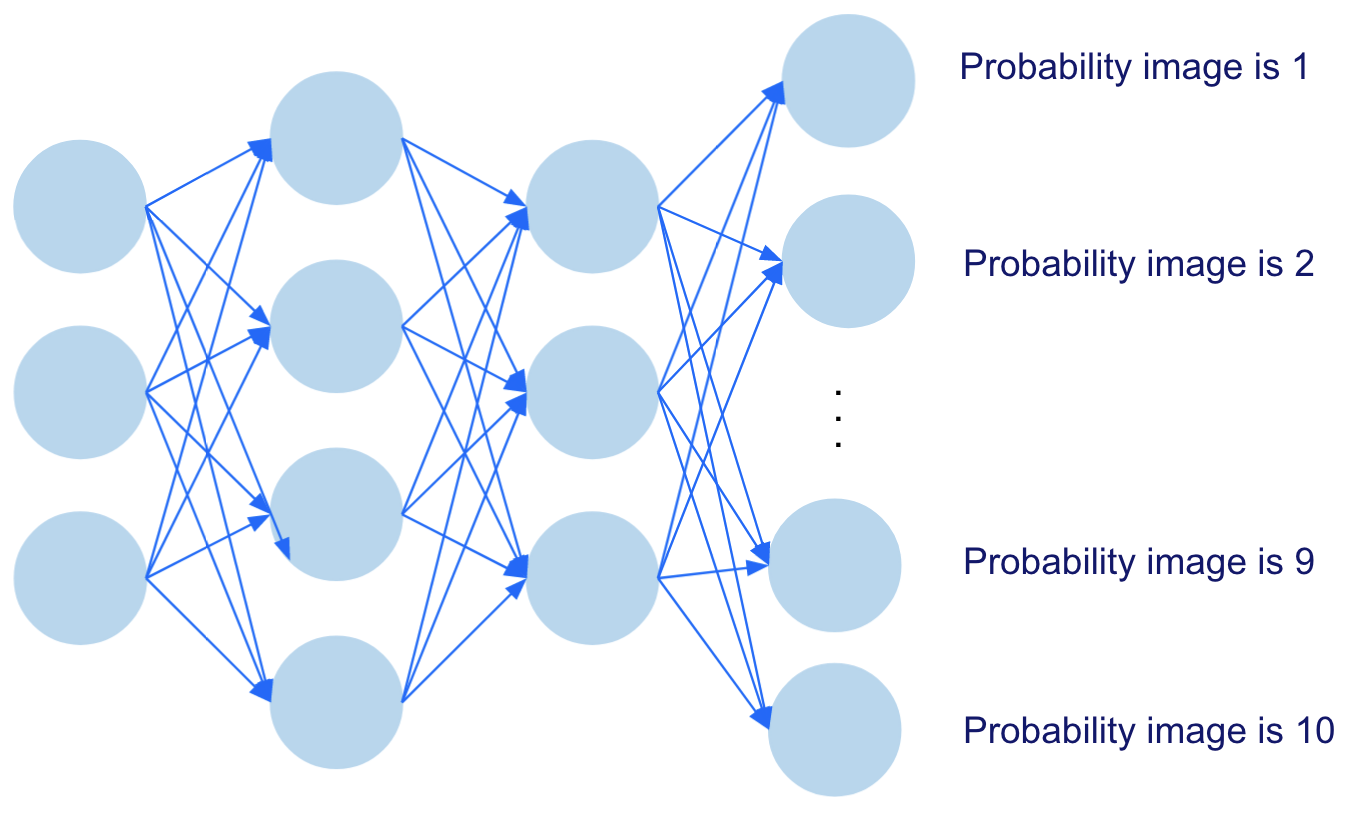

we see that we will need 3 inputs and 10 outputs. In between we have 2 hidden layers with respectively 4 and 3 nodes. This can be implemented in the following way:

In [ ]:
#Create new model
model = Sequential()

#Add an input and dense layer
model.add(Dense(4, input_shape=(3,), activation = 'relu'))
model.add(Dense(3, activation = 'relu'))
model.add(Dense(10, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 16        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                40        
Total params: 71
Trainable params: 71
Non-trainable params: 0
_________________________________________________________________


# Example 2

Please have a look at the documentation in order to better understand the different parameters

https://keras.io/api/models/model_training_apis/

In [ ]:
#Import
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot
from numpy import where
from tensorflow.keras.utils import to_categorical

## Step 1: we will generate some random data

We generate 3 classes of datapoints.

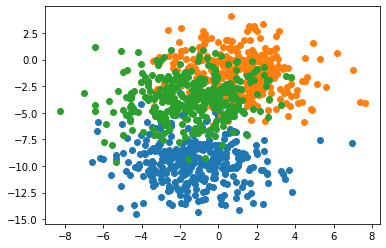

In [ ]:
# generate 2d classification dataset and check what it looks like
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)

for i in range(3):
  samples_ix = where(y == i)
  pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1])
pyplot.show()

## Step 2: make train and validation set

In [ ]:
# one hot encode output variable
y = to_categorical(y)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

## Step 3: define a model

In [ ]:
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

## Step 4: Compile a model

In [ ]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Step 5: Train the model

In [ ]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

## Step 6: Evaluate the model

Train: 0.824, Test: 0.834


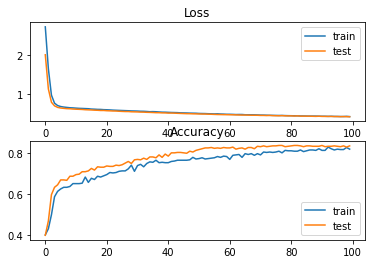

In [ ]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

# Exercise 1
Let's look into a real live example. We will download a dataset about Boston house prices. 

What happens when you change the argument 'test_split', what do you think would be a good value?

How many features do you see?

How many total data samples do we have?



In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(path="boston_housing.npz", test_split=0.2, seed=113)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404,) (102,)


In [ ]:
print(x_train[0])
print(y_train[0])

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


If you are interested in what the data we are using means, please find an overview below. You don't have to understand the full meaning of all data points.

**Inputs:**
 * crime: per capita crime rate by town

 * ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

 * INDUS: proportion of non-retail business acres per town

 * CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

 * NOX: nitric oxides concentration (parts per 10 million)

 * RM: average number of rooms per dwelling

 * AGE: proportion of owner-occupied units built prior to 1940

 * DIS: weighted distances to five Boston employment centres

 * RAD: index of accessibility to radial highways

 * TAX: full-value property-tax rate per 10,000

 * PTRATIO: pupil-teacher ratio by town

 * B: 1000(Bk - 0.63)^2 where Bk is the proportion of homeless by town

 * LSTAT: procentage lower status of the population


**Outputs**

 * MEDV: Median value of owner-occupied homes in $1000's

**Question**
Can you adapt the network given in 'Example 1' in such a way that it would be able the handles this data?

Which parameters do you HAVE to change? Which parameters can you decide yourself if you want to change them or not?

What do you learn from the learning curve? What happens to the curve if you change the number of epochs?

How do you interprete the error?

How does the learning curve change if you play with the model architecture itself?

In [ ]:
#Create new model
model = Sequential()

#Add an input and dense layer
model.add(Dense(130, input_shape=(13,), activation = 'relu'))
model.add(Dense(80, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

# print model summary
model.summary()

# compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

In [ ]:
# fit model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, verbose=0)

Train: 3.014, Test: 3.609


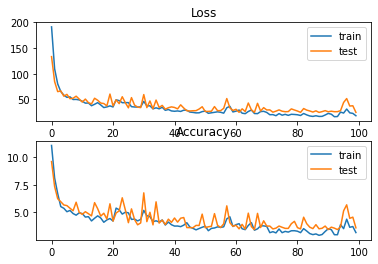

In [ ]:
# evaluate the model
_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['mean_absolute_error'], label='train')
pyplot.plot(history.history['val_mean_absolute_error'], label='test')
pyplot.legend()
pyplot.show()

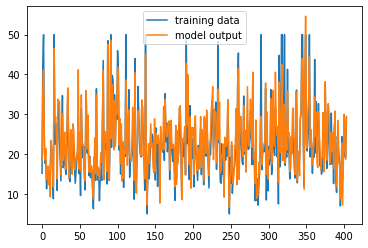

In [ ]:
y_eval = model.predict(x_train)
pyplot.plot(y_train, label='training data')
pyplot.plot(y_eval, label='model output')
pyplot.legend()

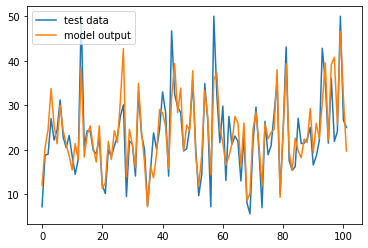

In [ ]:
y_eval_test = model.predict(x_test)
pyplot.plot(y_test, label='test data')
pyplot.plot(y_eval_test, label='model output')
pyplot.legend()